In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install torch==1.12.1+cu113 torchvision==0.13.1+cu113 torchaudio==0.12.1 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
  Using cached https://download.pytorch.org/whl/cu113/torch-1.12.1%2Bcu113-cp39-cp39-linux_x86_64.whl (1837.7 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchvision-0.13.1%2Bcu113-cp39-cp39-linux_x86_64.whl (23.4 MB)
  Using cached https://download.pytorch.org/whl/cu113/torchaudio-0.12.1%2Bcu113-cp39-cp39-linux_x86_64.whl (3.8 MB)
     |████████████████████████████████| 62 kB 2.3 MB/s  eta 0:00:01
  Using cached Pillow-9.5.0-cp39-cp39-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached numpy-1.25.0-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.7 MB)
     |████████████████████████████████| 199 kB 42.9 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 103.0 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 95.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install matplotlib

     |████████████████████████████████| 11.6 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 74.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 60.9 MB/s eta 0:00:01
     |████████████████████████████████| 300 kB 104.0 MB/s eta 0:00:01
     |████████████████████████████████| 102 kB 92.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
from data import get_data
from utils_plot import imshow
import torch
import numpy as np
import torchvision


In [3]:
'''
Loading data without normalization
'''

train_ds = get_data(train=True, normalize=False)
test_ds = get_data(train=False, normalize=False)

Compose(
    ToTensor()
)
Files already downloaded and verified
Compose(
    ToTensor()
)
Files already downloaded and verified


In [4]:
'''
Feeding the data to dataloader to get tensors
'''



SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_ds, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_ds, **dataloader_args)

CUDA Available? False


In [5]:
'''
Getting statistics of the data to normalize accordingly
'''

dataiter = iter(train_loader)
images, labels = next(dataiter)
print('[Train]')
print(' - Numpy Shape:', train_ds.data.shape)
print(' - Tensor Shape:', images.size())
print(' - min:', np.min(train_ds.data))
print(' - max:', np.max(train_ds.data))
print(' - mean R:', torch.mean(images[:, 0, :, :]))
print(' - std R:', torch.std(images[:, 0, :, :]))
print(' - var R:', torch.var(images[:, 0, :, :]))

print(' - mean G:', torch.mean(images[:, 1, :, :]))
print(' - std G:', torch.std(images[:, 1, :, :]))
print(' - var G:', torch.var(images[:, 1, :, :]))

print(' - mean B:', torch.mean(images[:, 2, :, :]))
print(' - std B:', torch.std(images[:, 2, :, :]))
print(' - var B:', torch.var(images[:, 2, :, :]))

[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([64, 3, 32, 32])
 - min: 0
 - max: 255
 - mean R: tensor(0.5002)
 - std R: tensor(0.2503)
 - var R: tensor(0.0626)
 - mean G: tensor(0.4978)
 - std G: tensor(0.2446)
 - var G: tensor(0.0598)
 - mean B: tensor(0.4644)
 - std B: tensor(0.2647)
 - var B: tensor(0.0701)


In [6]:
'''
Getting normalized data
'''

train_ds = get_data(train=True, normalize=True)
test_ds = get_data(train=False, normalize=True)

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.49, 0.45), std=(0.23, 0.23, 0.25))
)
Files already downloaded and verified
Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.49, 0.45), std=(0.23, 0.23, 0.25))
)
Files already downloaded and verified


In [7]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train_ds, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test_ds, **dataloader_args)

CUDA Available? False


In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
print('[Train]')
print(' - Numpy Shape:', train_ds.data.shape)
print(' - Tensor Shape:', images.size())
print(' - min:', np.min(train_ds.data))
print(' - max:', np.max(train_ds.data))
print(' - mean R:', torch.mean(images[:, 0, :, :]))
print(' - std R:', torch.std(images[:, 0, :, :]))
print(' - var R:', torch.var(images[:, 0, :, :]))

print(' - mean G:', torch.mean(images[:, 1, :, :]))
print(' - std G:', torch.std(images[:, 1, :, :]))
print(' - var G:', torch.var(images[:, 1, :, :]))

print(' - mean B:', torch.mean(images[:, 2, :, :]))
print(' - std B:', torch.std(images[:, 2, :, :]))
print(' - var B:', torch.var(images[:, 2, :, :]))

[Train]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([64, 3, 32, 32])
 - min: 0
 - max: 255
 - mean R: tensor(0.0010)
 - std R: tensor(1.0881)
 - var R: tensor(1.1840)
 - mean G: tensor(0.0341)
 - std G: tensor(1.0633)
 - var G: tensor(1.1305)
 - mean B: tensor(0.0576)
 - std B: tensor(1.0590)
 - var B: tensor(1.1214)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


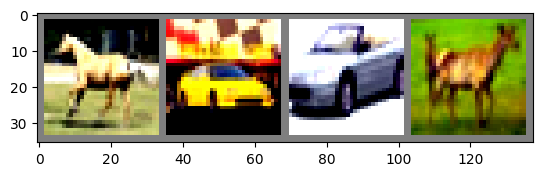

horse automobile automobile deer 


In [9]:
# get some random training images
batch_size=4
dataiter = iter(train_loader)
classes = train_ds.classes
images, labels = next(dataiter)
sampled_images = images[0: batch_size]
sampled_labels = labels[0: batch_size]

# show images
imshow(torchvision.utils.make_grid(sampled_images))
# print labels
print(' '.join(f'{classes[sampled_labels[j]]:5s}' for j in range(batch_size)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


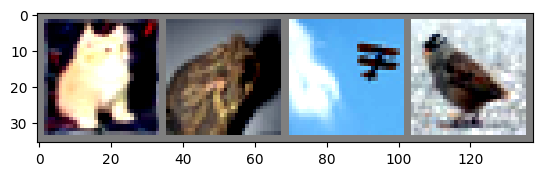

cat   frog  airplane bird 


In [10]:
# get some random testing images
batch_size=4
dataiter = iter(test_loader)
classes = test_ds.classes
images, labels = next(dataiter)
sampled_images = images[0: batch_size]
sampled_labels = labels[0: batch_size]

# show images
imshow(torchvision.utils.make_grid(sampled_images))
# print labels
print(' '.join(f'{classes[sampled_labels[j]]:5s}' for j in range(batch_size)))

In [9]:
import torch.nn as nn
import torch.nn.functional as F
import torch
class Net(nn.Module):
    def __init__(self) -> None:
        super(Net, self).__init__()
        
        self.base_channel = 8
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=self.base_channel, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel),
            nn.Dropout(0.02)
        )

        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel, out_channels=self.base_channel, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel),
            nn.Dropout(0.02)
        )

        self.trans_block1 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel, out_channels=self.base_channel * 2, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(num_features=self.base_channel * 2)
        )

        self.pool1 = nn.MaxPool2d((2, 2), stride=2)

        self.conv_block3 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 2, out_channels=self.base_channel * 2, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel * 2),
            nn.Dropout(0.02)
        )

        self.conv_block4 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 2, out_channels=self.base_channel * 2, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel * 2),
            nn.Dropout(0.02)
        )

        self.conv_block5 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 2, out_channels=self.base_channel * 2, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel * 2),
            nn.Dropout(0.02)
        )

        self.trans_block2 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 2, out_channels=self.base_channel * 4, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(num_features=self.base_channel * 4)
        )
        self.pool2 = nn.MaxPool2d((2, 2), stride=2)

        self.conv_block6 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 4, out_channels=self.base_channel * 4, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel * 4),
            nn.Dropout(0.02)
        )

        self.conv_block7 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 4, out_channels=self.base_channel * 4, kernel_size=(3,3), padding=1, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(num_features=self.base_channel * 4),
            nn.Dropout(0.02)
        )

        self.conv_block8 = nn.Sequential(
            nn.Conv2d(in_channels=self.base_channel * 4, out_channels=self.base_channel * 4, kernel_size=(3,3), padding=1, bias=False),
        )

        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=7) # 7>> 9... nn.AdaptiveAvgPool((1, 1))
        )

        self.out = nn.Conv2d(in_channels=self.base_channel * 4, out_channels=10, kernel_size=(1,1), bias=False)

    def forward(self, x):
        x = self.conv_block1(x) # rin = 1 rout = 3
        x = self.conv_block2(x) # rin = 3 rout = 5
        x = self.trans_block1(x) # rin = 5 rout = 5
        x = self.pool1(x) # rin = 5 rout = 6
        x = self.conv_block3(x) # rin = 6 rout = 10
        x = self.conv_block4(x) # rin = 10 rout = 14
        x = self.conv_block5(x) # rin = 14 rout = 18
        x = self.trans_block2(x) # rin = 18 rout = 18
        x = self.pool2(x) # rin = 18 rout = 20
        x = self.conv_block6(x) # rin = 20 rout = 28
        x = self.conv_block7(x) # rin = 28 rout = 36
        x = self.conv_block8(x) # rin = 36 rout = 44
        x = self.gap(x) 
        x = self.out(x)
        x = x.view(-1, 10)
        return F.log_softmax(x, dim=-1)


In [10]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)

model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
       BatchNorm2d-3            [-1, 8, 32, 32]              16
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
              ReLU-6            [-1, 8, 32, 32]               0
       BatchNorm2d-7            [-1, 8, 32, 32]              16
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             128
      BatchNorm2d-10           [-1, 16, 32, 32]              32
        MaxPool2d-11           [-1, 16, 16, 16]               0
           Conv2d-12           [-1, 16, 16, 16]           2,304
             ReLU-13           [-1, 16, 16, 16]               0
      BatchNorm2d-14           [-1,